In [1]:
import sys

# This allows you to run on Colaboratory and load files from your Google Drive
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/My Drive/'
except:
    main_path = ''
sys.path.append(main_path)

Mounted at /content/drive


In [2]:
%pip install uproot3

     |████████████████████████████████| 117 kB 4.8 MB/s 
     |████████████████████████████████| 87 kB 6.2 MB/s 


In [3]:
import uproot3
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from plotly import graph_objs as go
import pylab
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.1f' % x)
plt.style.use('seaborn-whitegrid')
plt.rcParams["grid.linestyle"] = (5,15)
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 22})

import warnings
warnings.filterwarnings('ignore')

In [4]:
def default_flatname(branchname, fieldname, index):
    """This replaces the dot in the column names with underscores"""
    out = branchname.replace(".", "_")
    if not isinstance(branchname, str):
        out = branchname.decode("utf-8")
    if fieldname is not None:
        fieldname.replace(".", "_")
        out += "_" + fieldname
    if index != ():
        out += "[" + "][".join(str(x) for x in index) + "]"
    return out

In [5]:
fOGeom = uproot3.open("drive/MyDrive/root_files_dzhadan/ord_geom_more_stat.root")
fDGeom = uproot3.open("drive/MyDrive/root_files_dzhadan/double_s_geom_more_stat3.root")

In [6]:
oHits = fOGeom["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)
dHits = fDGeom["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)

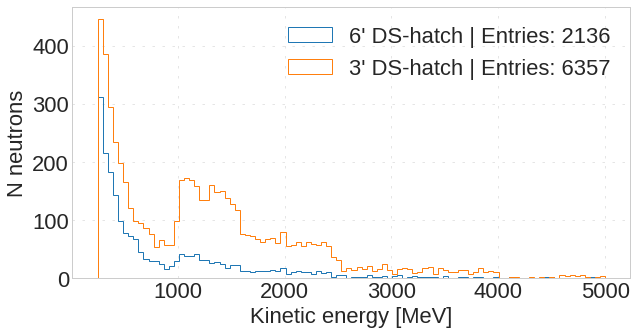

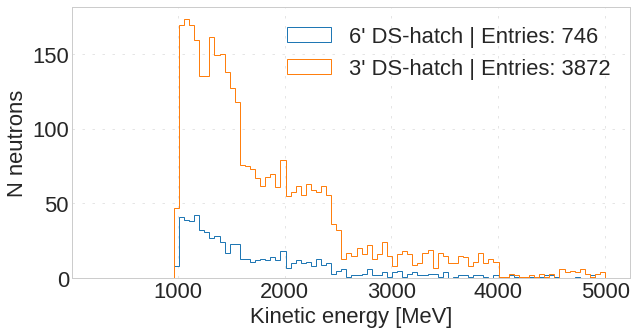

In [27]:
dcut = dHits.query("hits_ek > 250 & hits_pdgId == 2112")
ocut = oHits.query("hits_ek > 250 & hits_pdgId == 2112")

plt.hist(dcut["hits_ek"], range=(250,5000), bins=100, label='6\' DS-hatch | Entries: %d'%len(dcut), histtype='step');
plt.hist(ocut["hits_ek"], range=(250,5000), bins=100, label='3\' DS-hatch | Entries: %d'%len(ocut), histtype='step');
plt.ylabel('N neutrons')
plt.xlabel('Kinetic energy [MeV]')
plt.legend()

plt.figure()

dcut = dHits.query("hits_ek > 1000 & hits_pdgId == 2112")
ocut = oHits.query("hits_ek > 1000 & hits_pdgId == 2112")

plt.hist(dcut["hits_ek"], range=(250,5000), bins=100, label='6\' DS-hatch | Entries: %d'%len(dcut), histtype='step');
plt.hist(ocut["hits_ek"], range=(250,5000), bins=100, label='3\' DS-hatch | Entries: %d'%len(ocut), histtype='step');
plt.ylabel('N neutrons')
plt.xlabel('Kinetic energy [MeV]')
plt.legend()
#plt.yscale('log')

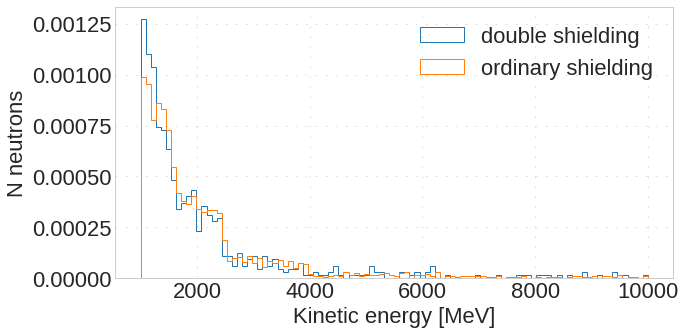

In [9]:
plt.hist(dcut["hits_ek"], range=(1000,10000), bins=100, label='double shielding', histtype='step', density=True);
plt.hist(ocut["hits_ek"], range=(1000,10000), bins=100, label='ordinary shielding', histtype='step', density=True);
# plt.xscale("log")
plt.ylabel('N neutrons')
plt.xlabel('Kinetic energy [MeV]')
plt.legend()